$\textbf{DS165-L - DATA ANALYTICS LABORATORY} \\ \texttt{SY2425}$

NAME: MA. ADDINE ANNE T. CARREON
 
SECTION: AM14

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

In [2]:
df = pd.read_csv('fetal_health.csv')

In [3]:
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [4]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


### Exploratory Data Analysis

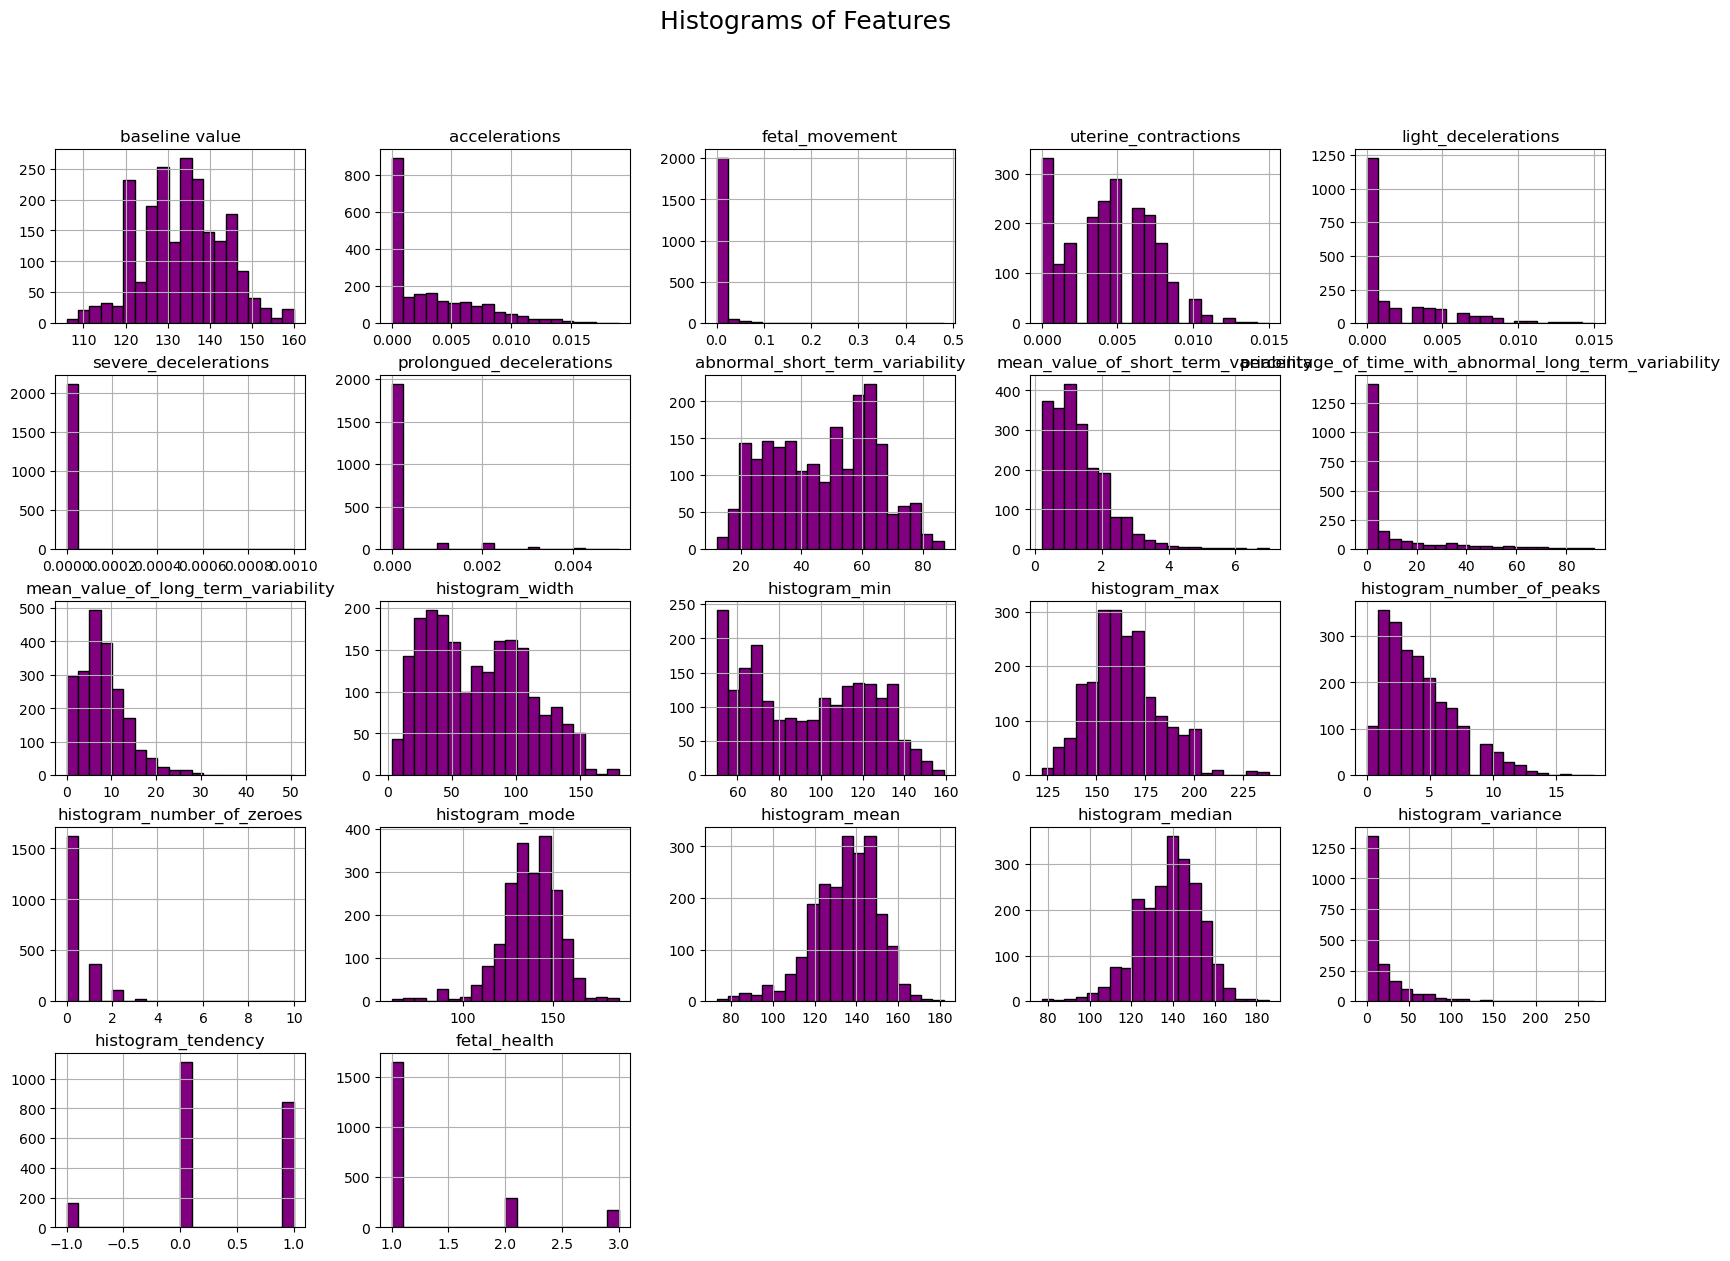

In [5]:
df.hist(figsize=(20, 14), bins=20, color='purple', edgecolor='black')
plt.suptitle('Histograms of Features', fontsize=18)
plt.show()

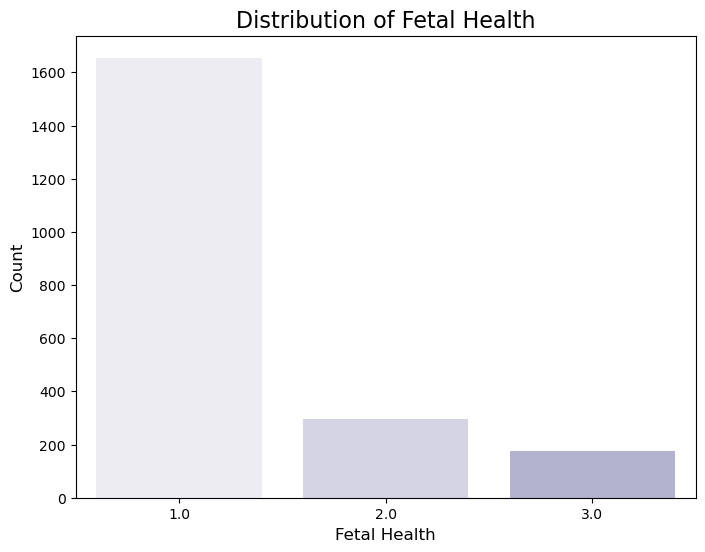

In [6]:
plt.figure(figsize=(8, 6))
sns.set_palette("Purples")
sns.countplot(x='fetal_health', data=df) 
plt.title('Distribution of Fetal Health', fontsize=16)
plt.xlabel('Fetal Health', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

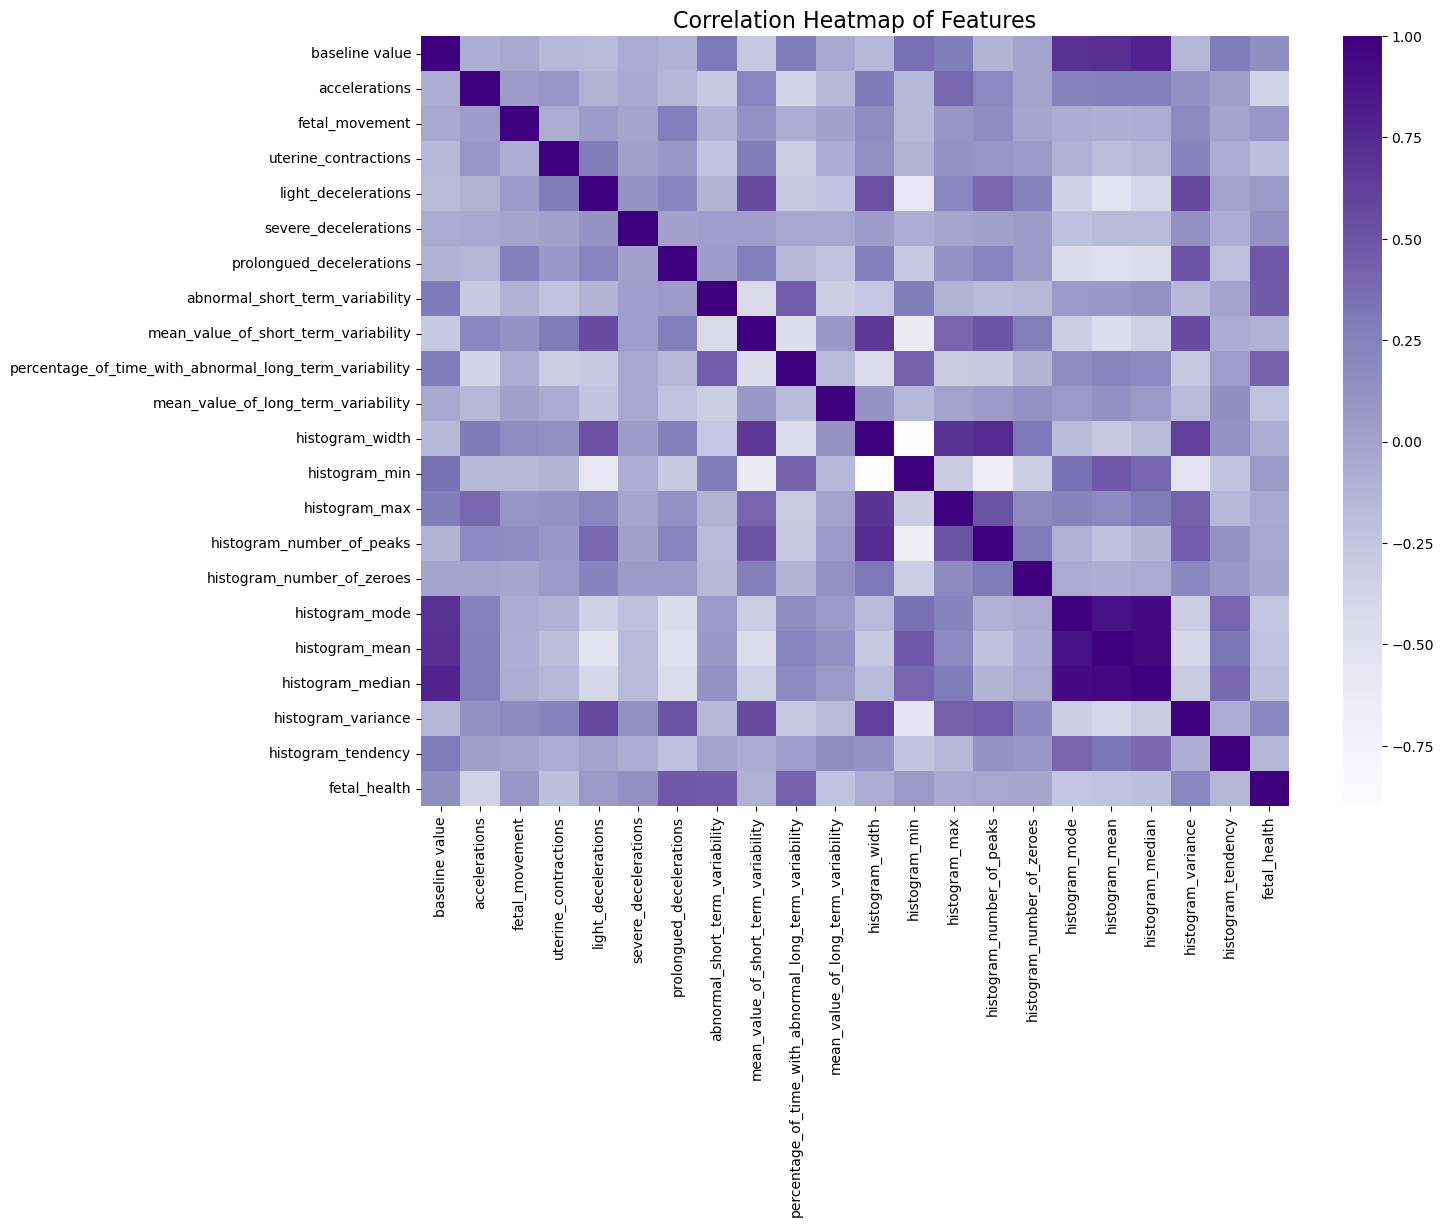

In [7]:
plt.figure(figsize=(14, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='Purples')
plt.title('Correlation Heatmap of Features', fontsize=16)
plt.show()

### Pre-processing

In [8]:
X = df.drop('fetal_health', axis=1)
y = df['fetal_health']

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=69)

<h3 style="color: #663399;">Logistic Regression</h3>

In [11]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Results:
              precision    recall  f1-score   support

         1.0       0.94      0.95      0.95       328
         2.0       0.67      0.68      0.67        56
         3.0       0.94      0.81      0.87        42

    accuracy                           0.90       426
   macro avg       0.85      0.81      0.83       426
weighted avg       0.90      0.90      0.90       426



In [12]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))

Confusion Matrix:
[[313  14   1]
 [ 17  38   1]
 [  3   5  34]]


<h3 style="color: #663399;">Naive Bayes</h3>

In [13]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print("Naïve Bayes Results:")
print(classification_report(y_test, y_pred_nb))

Naïve Bayes Results:
              precision    recall  f1-score   support

         1.0       0.99      0.70      0.82       328
         2.0       0.34      0.95      0.50        56
         3.0       0.73      0.64      0.68        42

    accuracy                           0.73       426
   macro avg       0.69      0.76      0.67       426
weighted avg       0.88      0.73      0.77       426



In [14]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))

Confusion Matrix:
[[230  89   9]
 [  2  53   1]
 [  0  15  27]]


<h3 style="color: #663399;">Support Vector Machine</h3>

In [15]:
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Results:")
print(classification_report(y_test, y_pred_svm))

SVM Results:
              precision    recall  f1-score   support

         1.0       0.95      0.96      0.95       328
         2.0       0.71      0.73      0.72        56
         3.0       0.97      0.79      0.87        42

    accuracy                           0.92       426
   macro avg       0.87      0.83      0.85       426
weighted avg       0.92      0.92      0.92       426



In [16]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

Confusion Matrix:
[[316  12   0]
 [ 14  41   1]
 [  4   5  33]]


### Visualizations

In [17]:
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
    plt.title(f'Confusion Matrix - {title}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

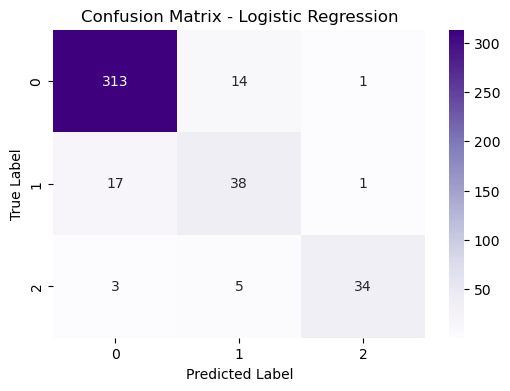

In [18]:
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
plot_confusion_matrix(cm_log_reg, 'Logistic Regression')

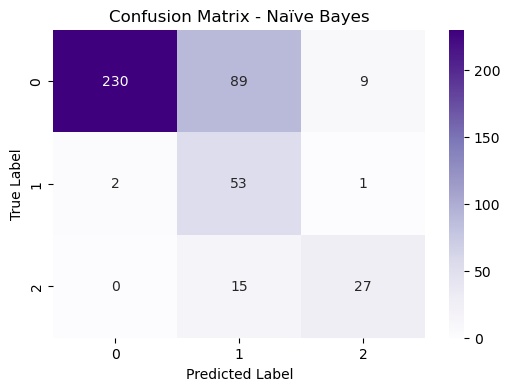

In [19]:
cm_nb = confusion_matrix(y_test, y_pred_nb)
plot_confusion_matrix(cm_nb, 'Naïve Bayes')

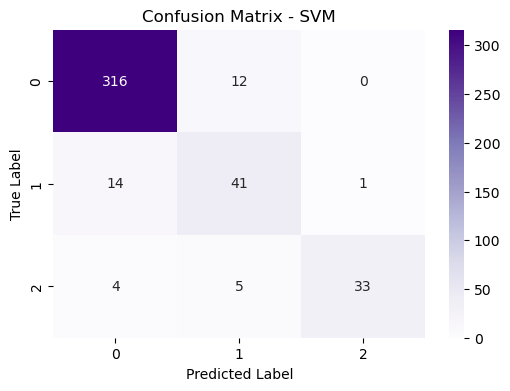

In [20]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
plot_confusion_matrix(cm_svm, 'SVM')

In [21]:
log_reg_probs = log_reg.predict_proba(X_test)
svm_probs = svm.predict_proba(X_test)

In [22]:
log_reg_auc = roc_auc_score(y_test, log_reg_probs, multi_class='ovr')
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, log_reg_probs[:, 1], pos_label=1)

In [23]:
svm_auc = roc_auc_score(y_test, svm_probs, multi_class='ovr')
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_probs[:, 1], pos_label=1)

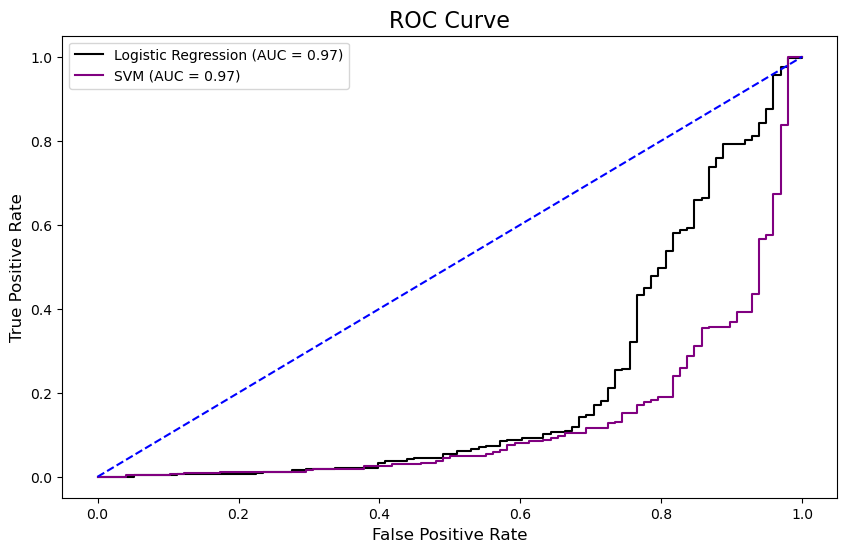

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(fpr_log_reg, tpr_log_reg, color='black', label=f'Logistic Regression (AUC = {log_reg_auc:.2f})')
plt.plot(fpr_svm, tpr_svm, color='purple', label=f'SVM (AUC = {svm_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='blue')
plt.title('ROC Curve', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend()
plt.show()

***
***